<a href="https://colab.research.google.com/github/Elwing-Chou/ximen_day_0709/blob/main/1_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns=iris["feature_names"])
df["y"] = iris["target"]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


1. 資料筆數: 看問題難度(越簡單就少) -> x多寡

a. 機器學習: 幾千-幾萬  
b. 深度學習: 幾萬-幾十萬筆

In [34]:
# drop
# Demo: axis的選擇 0/1
# d = pd.DataFrame([
#     [1, 2],
#     [3, 4]
# ])
# d.drop(0, axis=1)
x = df.drop("y", axis=1)
y = df["y"]

In [35]:
from sklearn.model_selection import train_test_split
# train_test_split([1, 2, 3, 4], [5, 6, 7, 8], test_size=0.25)
# 0.9x 0.1x 0.9y 0.1y
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal length (cm) <= 2.45\ngini = 0.666\nsamples = 135\nvalue = [47, 44, 44]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal length (cm) <= 4.85\ngini = 0.5\nsamples = 88\nvalue = [0, 44, 44]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.048\nsamples = 41\nvalue = [0, 40, 1]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.156\nsamples = 47\nvalue = [0, 4, 43]\nclass = virginica')]

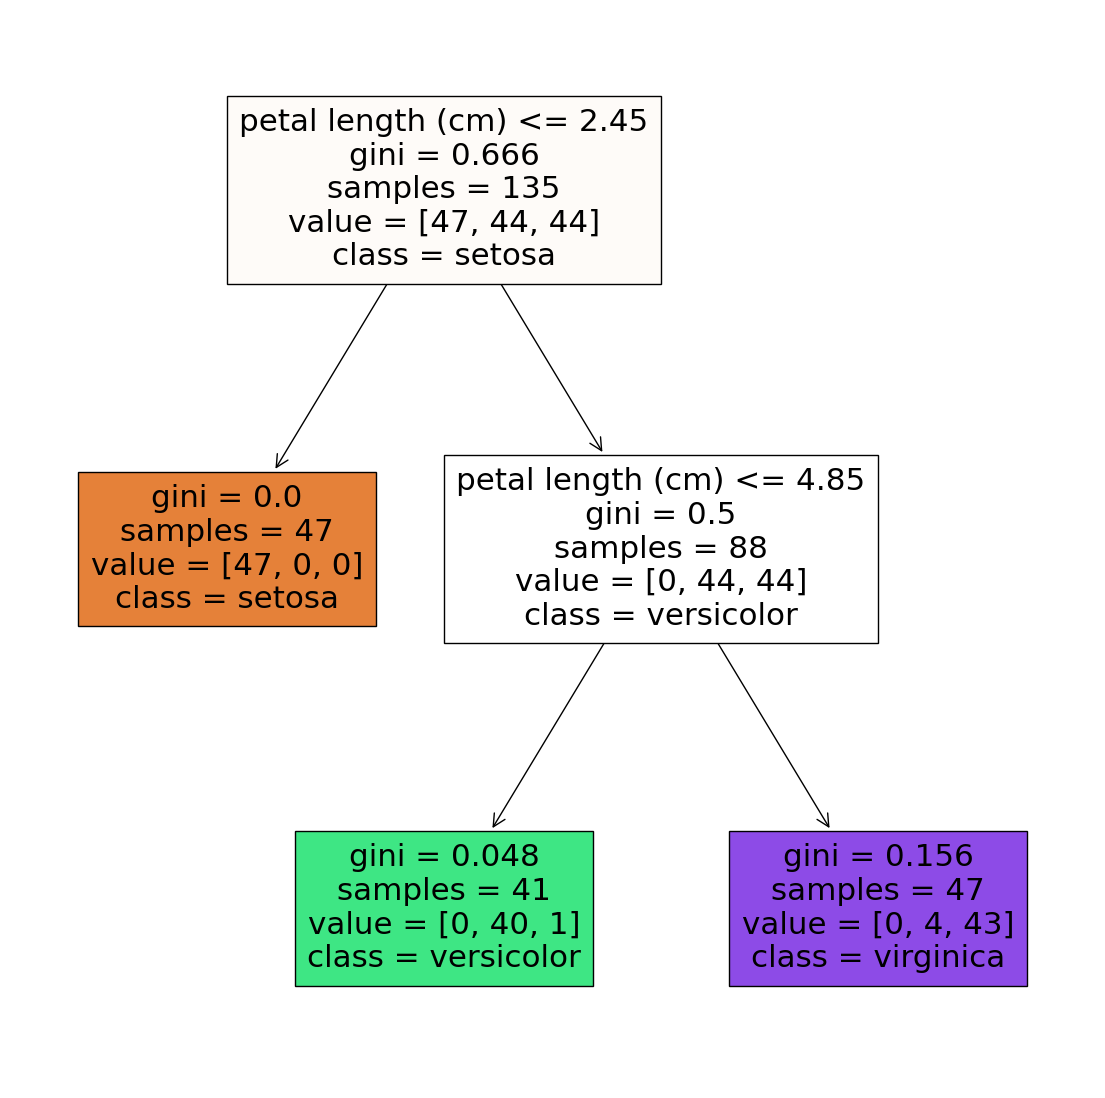

In [41]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=[14, 14])
plot_tree(clf,
     feature_names=x.columns,
     class_names=iris["target_names"],
     filled=True)

In [42]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(y_test, pre)

0.8666666666666667